In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
titanic_data=pd.read_csv("titanic.csv")

In [2]:
titanic_data.head

<bound method NDFrame.head of       pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embark

In [3]:
titanic_data.describe

<bound method NDFrame.describe of       pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin em

In [4]:
print("Missing values in the data values")
total = titanic_data.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print(missing_data)

Missing values in the data values
           Total     %
body        1189  90.8
cabin       1015  77.5
boat         824  62.9
home.dest    565  43.1
age          264  20.2
embarked       3   0.2
fare           2   0.2
ticket         1   0.1
parch          1   0.1
sibsp          1   0.1
sex            1   0.1
name           1   0.1
survived       1   0.1
pclass         1   0.1


In [5]:
print(" Q1. Find out the overall chance of survival for a Titanic passenger")

print("No. of passengers survived = ",titanic_data['survived'].value_counts()[1])
print("Passengers survival percentage = ",titanic_data['survived'].value_counts(normalize=True)[1]*100)

 Q1. Find out the overall chance of survival for a Titanic passenger
No. of passengers survived =  500
Passengers survival percentage =  38.19709702062643


 Q2) Find out the chance of survival for a Titanic passenger based on their sex and plot it.
Female passangers survived percentage =  72.74678111587983
Male passangers survived percentage =  19.098457888493474


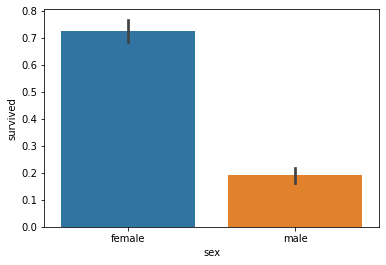

In [7]:
print(" Q2) Find out the chance of survival for a Titanic passenger based on their sex and plot it.")

sns.barplot(x="sex", y="survived", data=titanic_data)
print("Female passangers survived percentage = ", titanic_data["survived"][titanic_data["sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Male passangers survived percentage = ", titanic_data["survived"][titanic_data["sex"] == 'male'].value_counts(normalize = True)[1]*100)

 Q3) Find out the chance of survival for a Titanic passenger by traveling class wise and plot it
P_Class-1 passangers survived percentage =  61.91950464396285
P_Class-2 passangers survived percentage =  42.96028880866426
P_Class-3 passangers survived percentage =  25.52891396332863


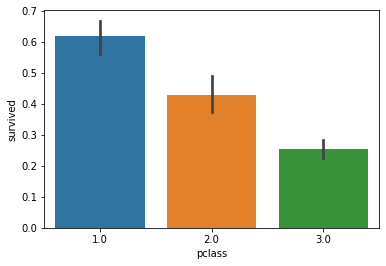

In [8]:
print(" Q3) Find out the chance of survival for a Titanic passenger by traveling class wise and plot it")

sns.barplot(x="pclass", y="survived", data=titanic_data)
print("P_Class-1 passangers survived percentage = ", titanic_data["survived"][titanic_data["pclass"] == 1].value_counts(normalize = True)[1]*100)
print("P_Class-2 passangers survived percentage = ", titanic_data["survived"][titanic_data["pclass"] == 2].value_counts(normalize = True)[1]*100)
print("P_Class-3 passangers survived percentage = ", titanic_data["survived"][titanic_data["pclass"] == 3].value_counts(normalize = True)[1]*100)

 Q4) Find out the average age for a Titanic passenger who survived by passenger class and sex.


<AxesSubplot:title={'center':'Age/Sex per Survivors'}, xlabel='pclass', ylabel='age'>

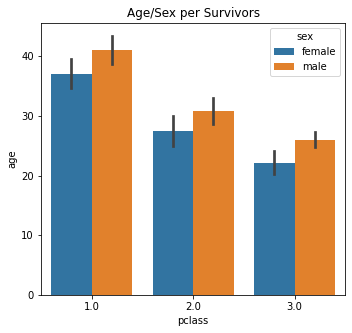

In [9]:
print(" Q4) Find out the average age for a Titanic passenger who survived by passenger class and sex.")

fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
plt.title('Age/Sex per Survivors')
sns.barplot(data=titanic_data, x='pclass',y='age',hue='sex')

In [10]:

meanAgeTrnMale = round(titanic_data[(titanic_data['sex'] == "male")]['age'].groupby(titanic_data['pclass']).mean(),2)
meanAgeTrnFeMale = round(titanic_data[(titanic_data['sex'] == "female")]['age'].groupby(titanic_data['pclass']).mean(),2)
print('Age MEAN per Sex')
print(pd.concat([meanAgeTrnMale, meanAgeTrnFeMale], axis = 1,keys= ['Male','Female']))

Age MEAN per Sex
         Male  Female
pclass               
1.0     41.03   37.04
2.0     30.82   27.50
3.0     25.96   22.19


Q5) Find out the chance of survival for a Titanic passenger based on number of siblings the passenger had on the ship and plot it
SibSp 0 Survivors percentage =  34.68013468013468
SibSp 1 Survivors percentage =  51.09717868338558
SibSp 2 Survivors percentage =  45.23809523809524


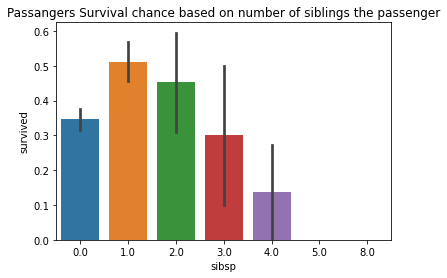

In [11]:
print("Q5) Find out the chance of survival for a Titanic passenger based on number of siblings the passenger had on the ship and plot it")

sns.barplot(x="sibsp", y="survived", data=titanic_data)
plt.title('Passangers Survival chance based on number of siblings the passenger')
print("SibSp 0 Survivors percentage = ", titanic_data["survived"][titanic_data["sibsp"] == 0].value_counts(normalize = True)[1]*100)
print("SibSp 1 Survivors percentage = ", titanic_data["survived"][titanic_data["sibsp"] == 1].value_counts(normalize = True)[1]*100)
print("SibSp 2 Survivors percentage = ", titanic_data["survived"][titanic_data["sibsp"] == 2].value_counts(normalize = True)[1]*100)

 Q6) Find out the chance of survival for a Titanic passenger based on number of parents/children the passenger had on the ship and plot it.


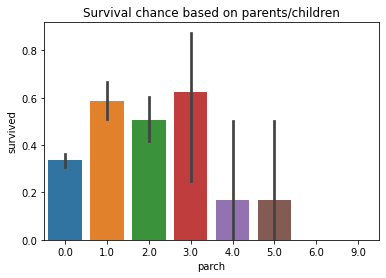

Parch 0 Survivors percentage =  33.532934131736525
Parch 0 Survivors percentage =  58.82352941176471
Parch 0 Survivors percentage =  50.442477876106196
Parch 0 Survivors percentage =  62.5


In [12]:
print(" Q6) Find out the chance of survival for a Titanic passenger based on number of parents/children the passenger had on the ship and plot it.")
sns.barplot(x="parch", y="survived", data=titanic_data)
plt.title('Survival chance based on parents/children')
plt.show()
print("Parch 0 Survivors percentage = ", titanic_data["survived"][titanic_data["parch"] == 0].value_counts(normalize = True)[1]*100)
print("Parch 0 Survivors percentage = ", titanic_data["survived"][titanic_data["parch"] == 1].value_counts(normalize = True)[1]*100)
print("Parch 0 Survivors percentage = ", titanic_data["survived"][titanic_data["parch"] == 2].value_counts(normalize = True)[1]*100)
print("Parch 0 Survivors percentage = ", titanic_data["survived"][titanic_data["parch"] == 3].value_counts(normalize = True)[1]*100)

 Q7) Plot out the variation of survival and death amongst passengers of different age


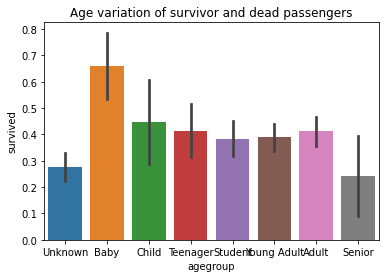

In [13]:
print(" Q7) Plot out the variation of survival and death amongst passengers of different age")

titanic_data["age"] = titanic_data["age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
titanic_data['agegroup'] = pd.cut(titanic_data['age'], bins, labels = labels)
sns.barplot(x="agegroup", y="survived", data=titanic_data)
plt.title('Age variation of survivor and dead passengers')
plt.show()

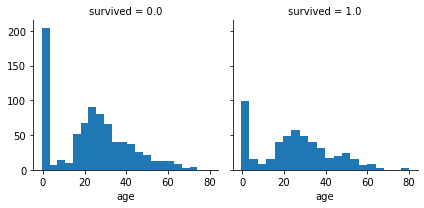

In [14]:

g = sns.FacetGrid(titanic_data, col='survived')
g.map(plt.hist, 'age', bins=20)

 Q8) Plot out the variation of survival and death with age amongst passengers of different passenger classes
Age and Class variation of survivor and dead passengers


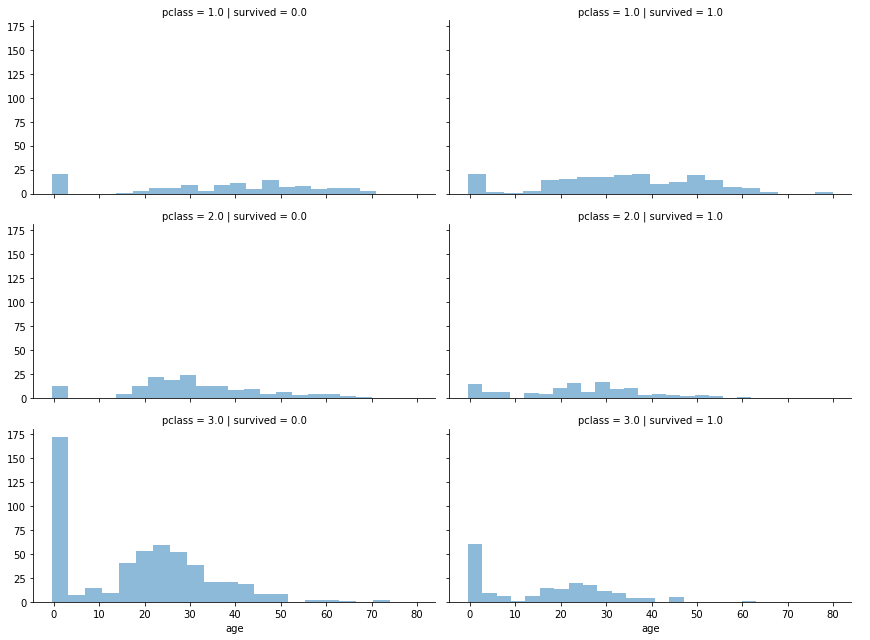

In [15]:
print(" Q8) Plot out the variation of survival and death with age amongst passengers of different passenger classes")

print("Age and Class variation of survivor and dead passengers")
grid = sns.FacetGrid(titanic_data, col='survived', row='pclass', size=3, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [17]:
print(" Q9) Find out the survival probability for a Titanic passenger based on title from the name of passenger.")

combine = [titanic_data, titanic_data]
for dataset in combine:
    dataset['Title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic_data['Title'],titanic_data['sex'])

 Q9) Find out the survival probability for a Titanic passenger based on title from the name of passenger.


sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

titanic_data[['Title', 'survived']].groupby(['Title'], as_index=False).mean()

,Title,survived
0,Master,0.508197
1,Miss,0.678030
2,Mr,0.162483
3,Mrs,0.787879
4,Rare,0.333333
5,Royal,1.000000
